In [2]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler,  PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Class Imbalance
from imblearn.over_sampling import SMOTE

## Model Selection and Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV


# Machine Learning Models
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/okothchristopher/Machine-Learning-Projects/master/03.%20Week%203%20Classification%20Project%20-%20Credit%20Default%20Prediction/Classification%20Project%201/raw-data.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [4]:
#Renaming columns
df = df.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
df.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


In [5]:
#standardizing column names for easier usage
df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(1)

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,total_sanctioned_amount_in_the_secured_loans_which_are_live,total_sanctioned_amount_in_the_unsecured_loans_which_are_live,maximum_amount_sanctioned_for_any_two_wheeler_loan,time_since_last_personal_loan_taken_in_months,time_since_first_consumer_durables_loan_taken_in_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0


In [ ]:
#df.info()

In [ ]:
#df.describe()

### Insights from Basic Data Analysis:
1. We have around 119k observations and a number of columns have missing values, we will explore these further and determine the missingneess characteristic and treat them accordingly.
2. We  have some features that are categorical data and some are numerical
3. Label is a discrete variable (classification problem) - We will explore the distribution of the target variable.
4. We have some extra features which are not relevent for building a machine learning model (need to remove them) - Like Customer ID

In [6]:
# Remove extraneous columns
df.drop(['customer_id','date_of_birth'], axis=1, inplace=True)

# Separating the numerical variables from the categorical variables, in case we need to treat them separately
num_var=df.select_dtypes(include=[np.number])
cat_var=df.select_dtypes(include=[object])

#EDA

Text(0.5, 1.0, 'Missing Values Heatmap')

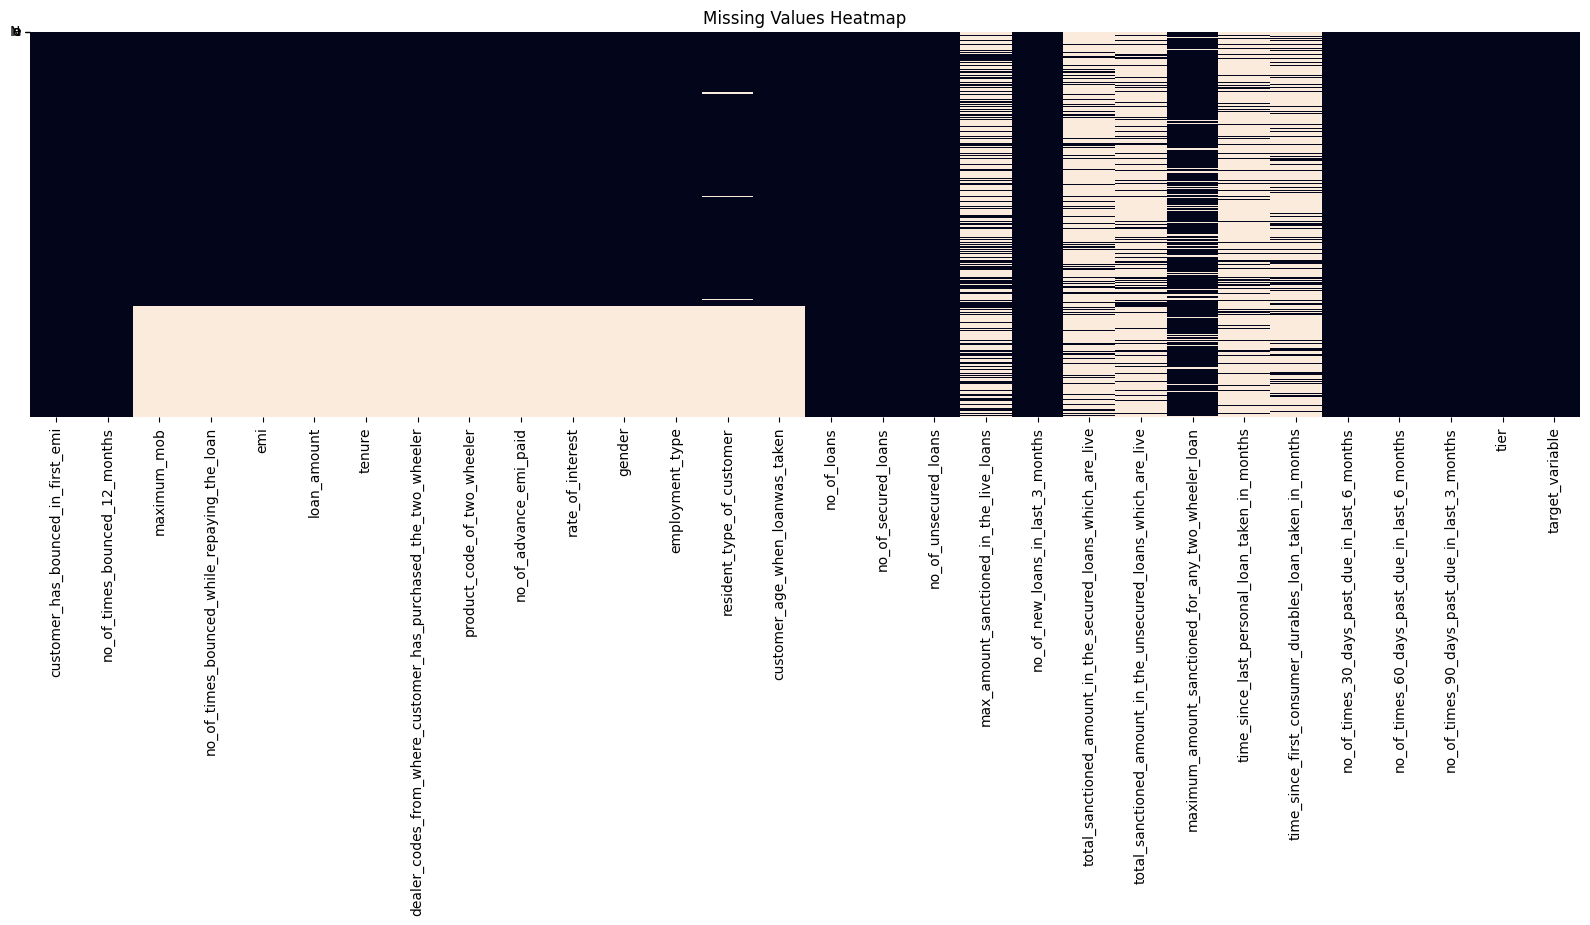

In [7]:
## Start by exploring missiness
plt.figure(figsize=(20,5))

sns.heatmap(df.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

Based on the heat map of the missing values we can determine on what action to take dependig with the percentage of the missiong values.
For the numerical values we will use mean while for the categorical values we will use mode.
for the ones missing a large chunk of data we will drop them.

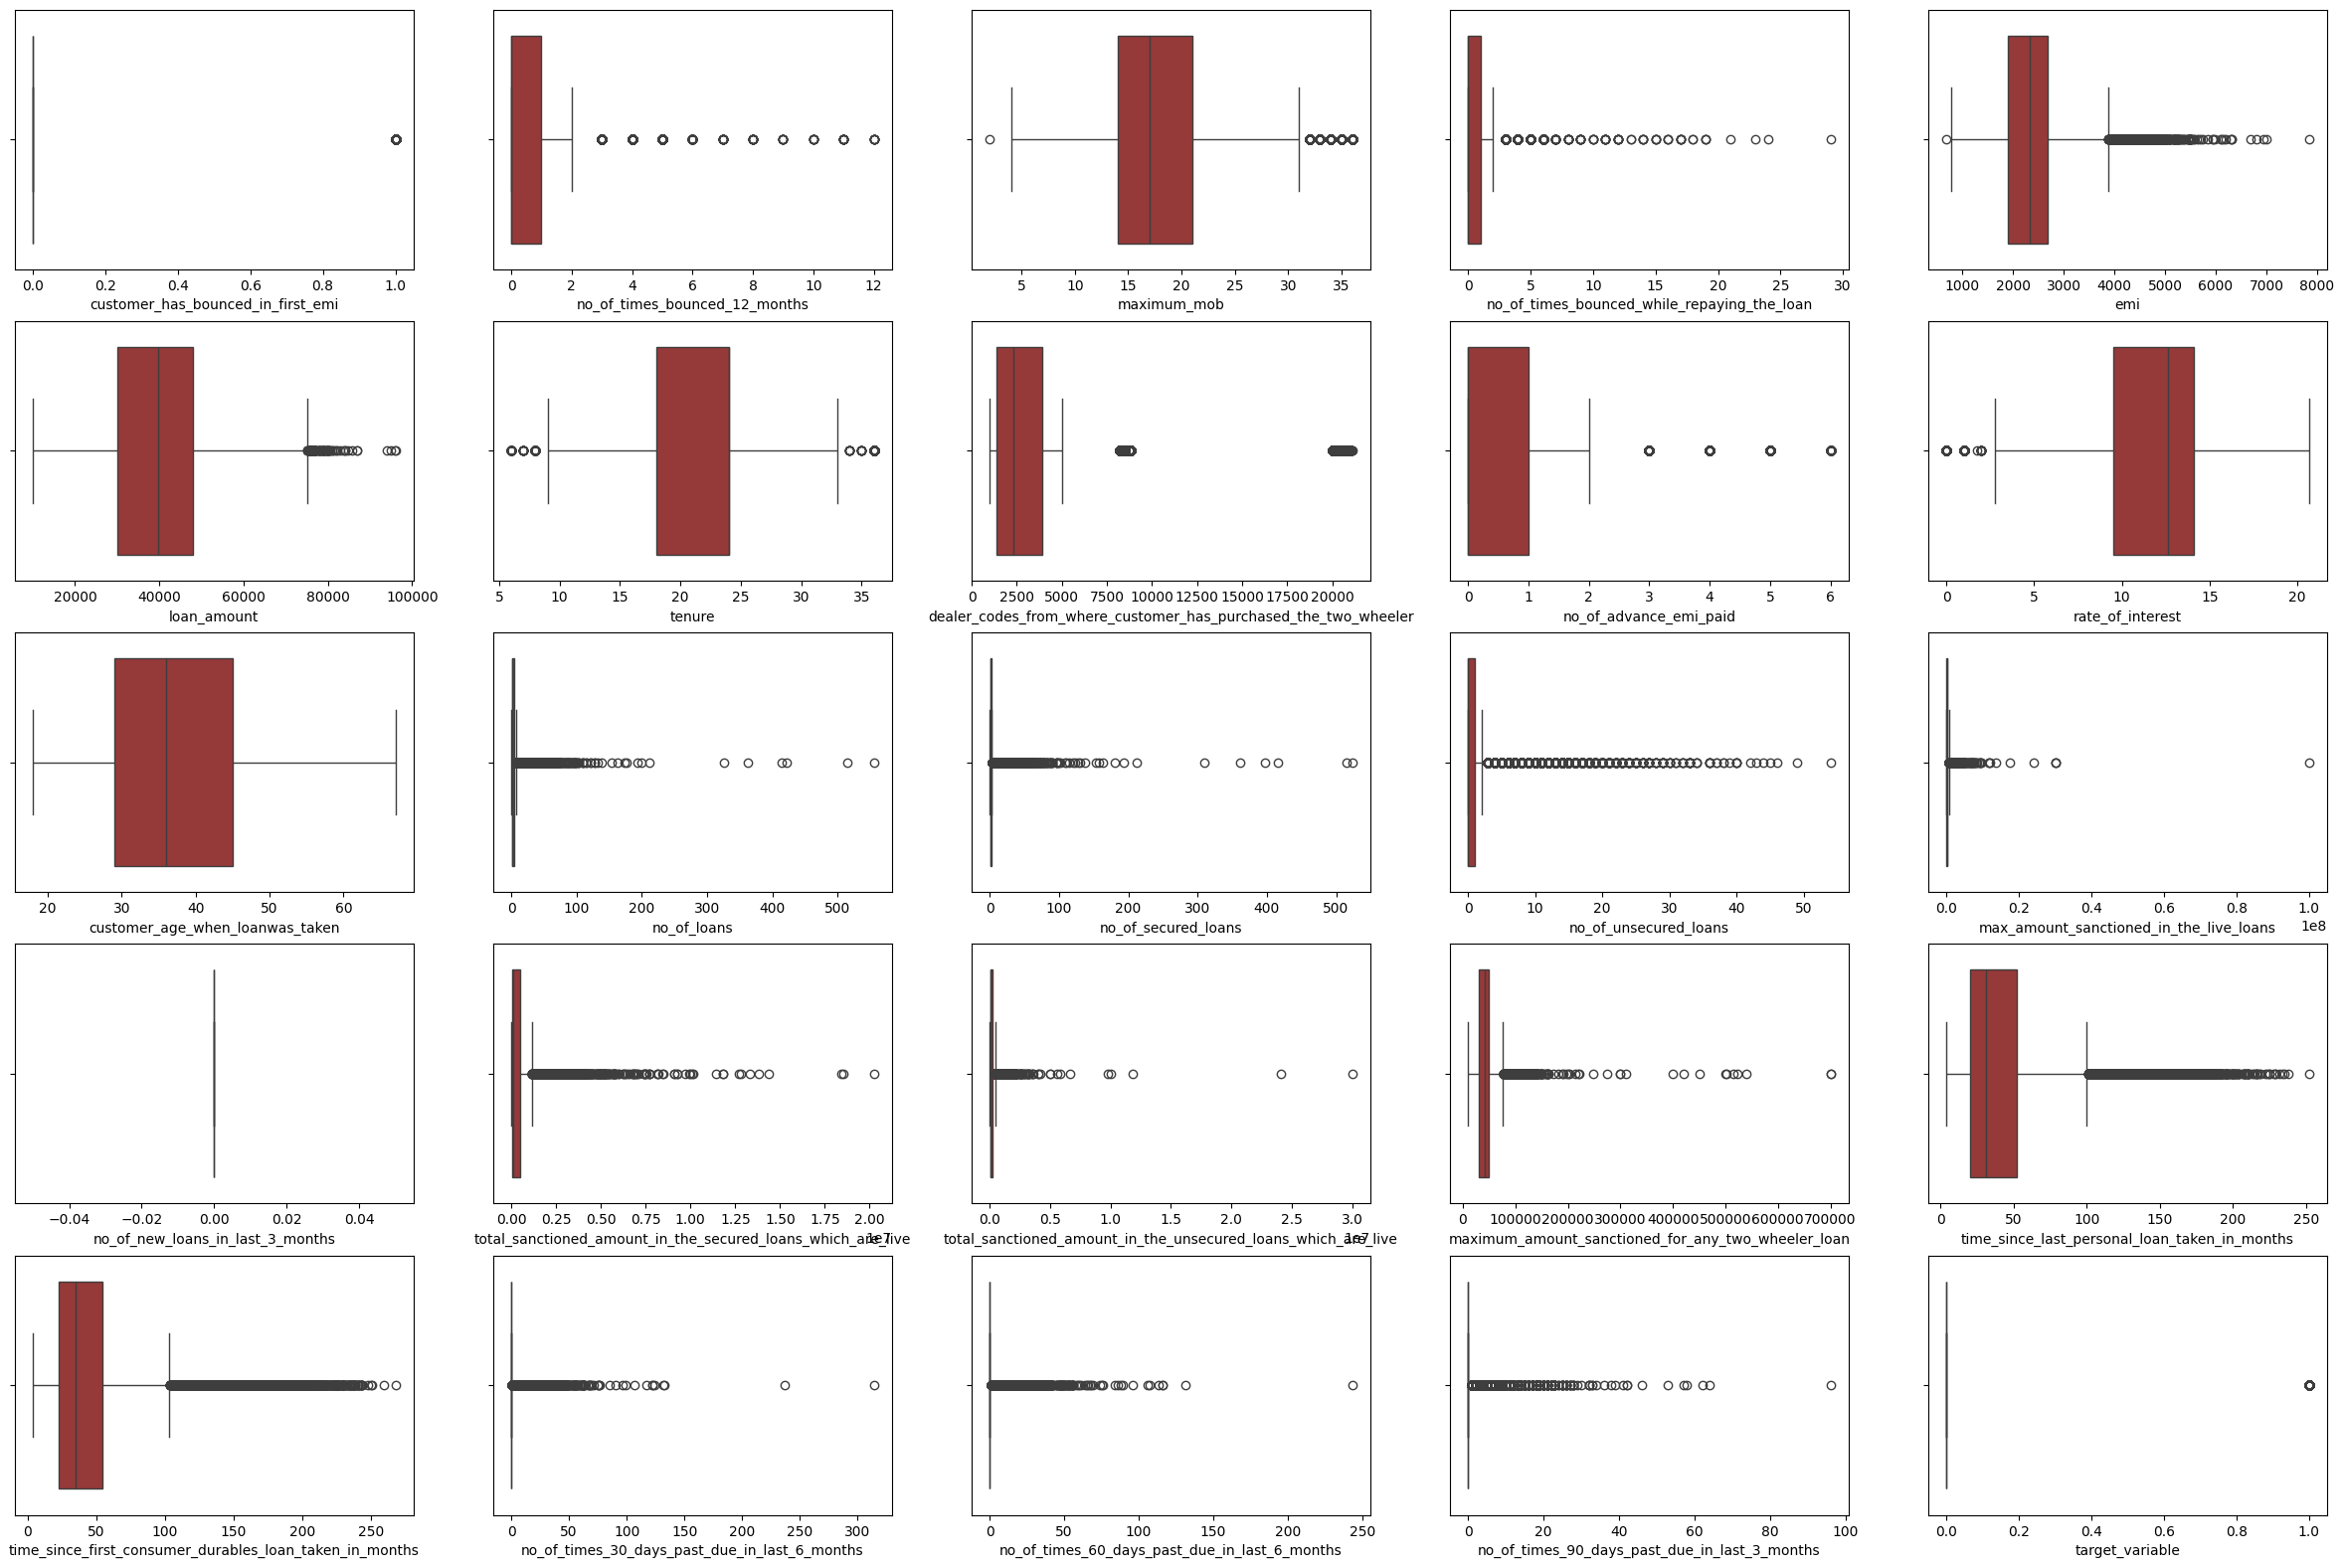

In [8]:
## Explore presecence of outliers
# Unitvariate analysis of all the numerical variables - we are trying to see if there are outliers.
fig = plt.figure(figsize=(30,40))
for i,j in zip(num_var,range(len(num_var.columns))):
    ax = fig.add_subplot(10,5, j+1)
    sns.boxplot(data=df,x=df[i],orient='v',color="brown")

In [9]:
### Linear Seperability

#Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(num_var.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=50) #Randomly choose 50 bivariate relationships to visualise. Total bivariate relationships (465 = 30C2) is too much
df['target_variable'] = df['target_variable'].astype('int') # Convert our tarrget variable to categorical because it is classification.



In [10]:
fig = plt.figure(figsize=(15, 15))  # Reduce figure size
num_plots = min(50, len(rand))  # Limit the number of subplots

for i in range(num_plots):
    ax = fig.add_subplot(10, 5, i+1)
    ax.scatter(num_var[num_var.columns[rand[i][0]]], num_var[num_var.columns[rand[i][1]]], c=df.target_variable, alpha=0.5)  # Reduce opacity for faster rendering


### Insights / Deduction
1. Most data features are not linearly separable for the classification problem as seen from bivariate scatter plots
2. **Inituition:** Support Vector Machines and Ensemble Methods would probably be the models for this data as they can work non-linear separations

Text(0.5, 1.0, 'Ratio of Customers Who Defaulted and Who did Not')

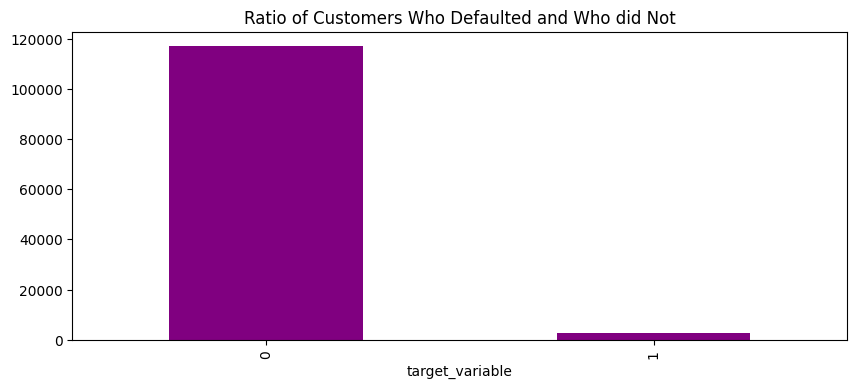

In [11]:
### Class Imbalance/Lack of it thereof.
df.target_variable.value_counts().plot(kind = "bar", figsize = (10,4),color='purple')
plt.title("Ratio of Customers Who Defaulted and Who did Not")

### Insights
- Most people actually pay their loans and defaulters form less than 10% of the data.
- This is a classic case of class imbalance - We are going to generate synthetic data to compensate for the minority class using the SMOTE algo.
- We will also try other methods of class imbalance handling - i.e random oversampling of the minority class, randomg undersampling of the majority class and we will check how this afffects the model performance.

#DATA PREP


In [12]:
## Missing values
# For columns with more than 50% missing we are going to delete]
# We need to provide better ratonale for our missing value tratements as and when they come. This is
df.dropna(thresh=df.shape[0]*0.6,axis=1, inplace = True)

## For other colums we are doing a mean for nume and mode for the cat
fill = dict()

for i in range(len(df.columns)):

    if df.columns[i] in num_var:
        fill[df.columns[i]] = df[df.columns[i]].mean()

    else:
        fill[df.columns[i]] = str(df[df.columns[i]].mode()).split()[1]

print(len(fill))
df = df.fillna(value=fill)


25


In [13]:
## Ecoding
col_tr = make_column_transformer((OrdinalEncoder(),['tier']),(OneHotEncoder(), ['product_code_of_two_wheeler','gender','employment_type','resident_type_of_customer']), remainder="passthrough")
df_transformed = col_tr.fit_transform(df)

print(df_transformed.shape)

(119528, 36)


In [14]:
pd.DataFrame(df_transformed).head(1)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,40.0,1.0,1.0,0.0,0.0,46500.0,0.0,0.0,0.0,0.0


In [15]:
X = df_transformed[:,:35]
y = df.target_variable
print(X.shape,y.shape)


(119528, 35) (119528,)


In [16]:
## Class Imbalance
# Smote - Synthetic Minority Oversampling Technique

smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
X, y=smote_sample.fit_resample(X,y)


#Model Selection

In [17]:
#Train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(163679, 35) (70149, 35) (163679,) (70149,)


In [18]:
#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=1), LogisticRegression(penalty='none', solver='lbfgs'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.74838099 0.74331012 0.74996945 0.74129399 0.74852604] 0.7462961175833484


In [19]:
# classification - Random Forest
pipe = make_pipeline(PolynomialFeatures(degree=1),RobustScaler(),RandomForestClassifier())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.97702835 0.97611193 0.97592864 0.97510386 0.97488926] 0.975812407681221


## Model Evaluation and Error Analysis

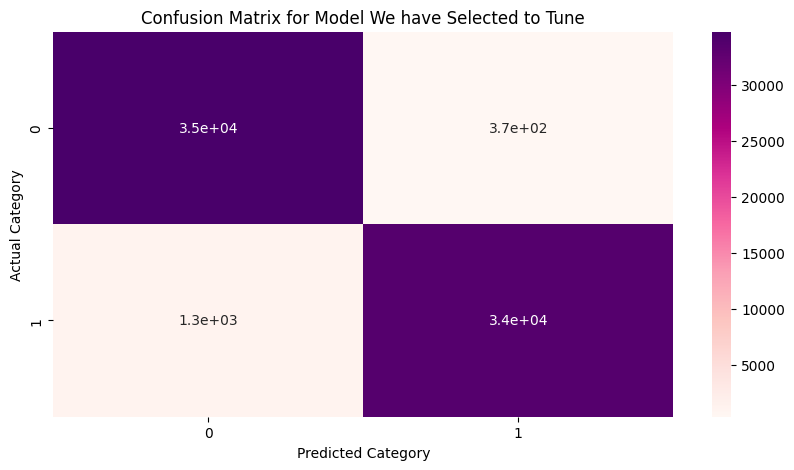

array([[34795,   371],
       [ 1292, 33691]])

In [20]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

#Visualise the matrix
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap='RdPu')
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Model We have Selected to Tune")
plt.show()

matrix

#Model Hyperparameter Ttuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#create a feature space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_


print("Best Parameters:", best_params)
print("Best Score:", best_score)


##Randomized CV

In [22]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)


In [23]:
random_search = RandomizedSearchCV(estimator=rf, param_distriutions=param_grid, cv=5, scoring='accuracy',n_inter=5)

NameError: name 'param_grid' is not defined

In [ ]:
random_search.fit(X_train,y_train)